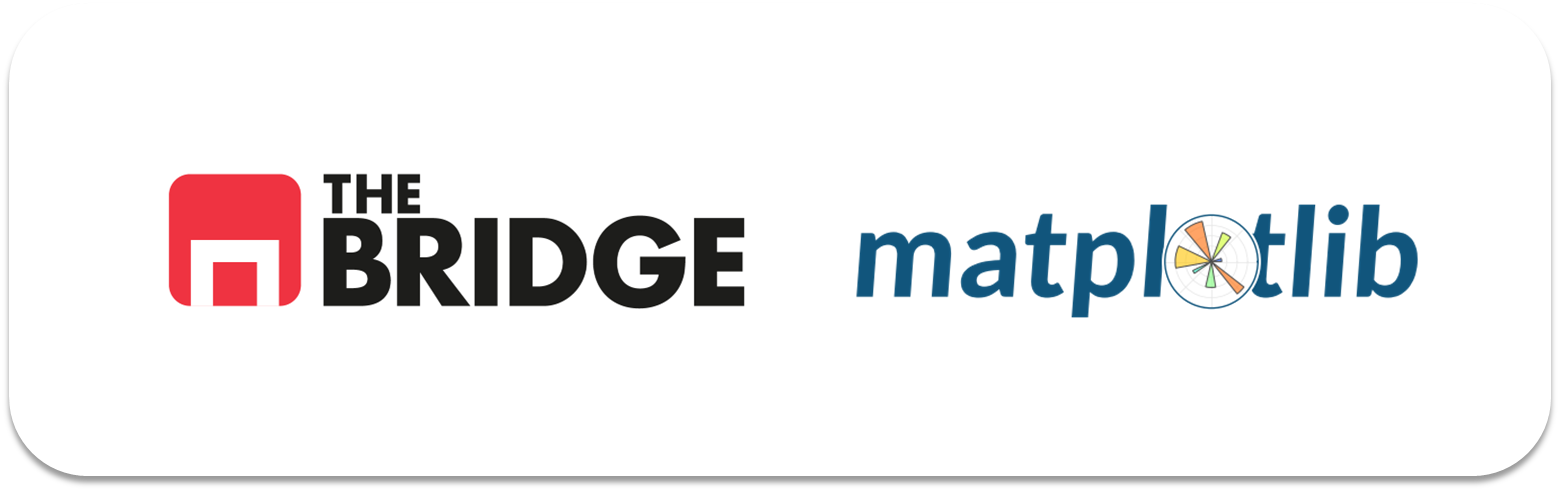

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [47]:
df_california = pd.read_csv("./data/california_cities.csv")
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [48]:
# Me deshago de las columnas que tengas nulos
df_california.drop(columns = ["elevation_ft", "area_total_sq_mi", "area_water_sq_mi", "area_total_km2", "area_land_km2", "area_water_percent"], inplace = True)

In [49]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        482 non-null    int64  
 1   city              482 non-null    object 
 2   latd              482 non-null    float64
 3   longd             482 non-null    float64
 4   elevation_m       434 non-null    float64
 5   population_total  482 non-null    int64  
 6   area_land_sq_mi   482 non-null    float64
 7   area_water_km2    478 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 30.3+ KB


In [50]:
df_california.head()

,Unnamed: 0,city,latd,longd,elevation_m,population_total,area_land_sq_mi,area_water_km2
0,0,Adelanto,34.576111,-117.432778,875.0,31765,56.009,0.046
1,1,AgouraHills,34.153333,-118.761667,281.0,20330,7.793,0.076
2,2,Alameda,37.756111,-122.274444,NaN,75467,10.611,31.983
3,3,Albany,37.886944,-122.297778,NaN,18969,1.788,9.524
4,4,Alhambra,34.081944,-118.135000,150.0,83089,7.631,0.003


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

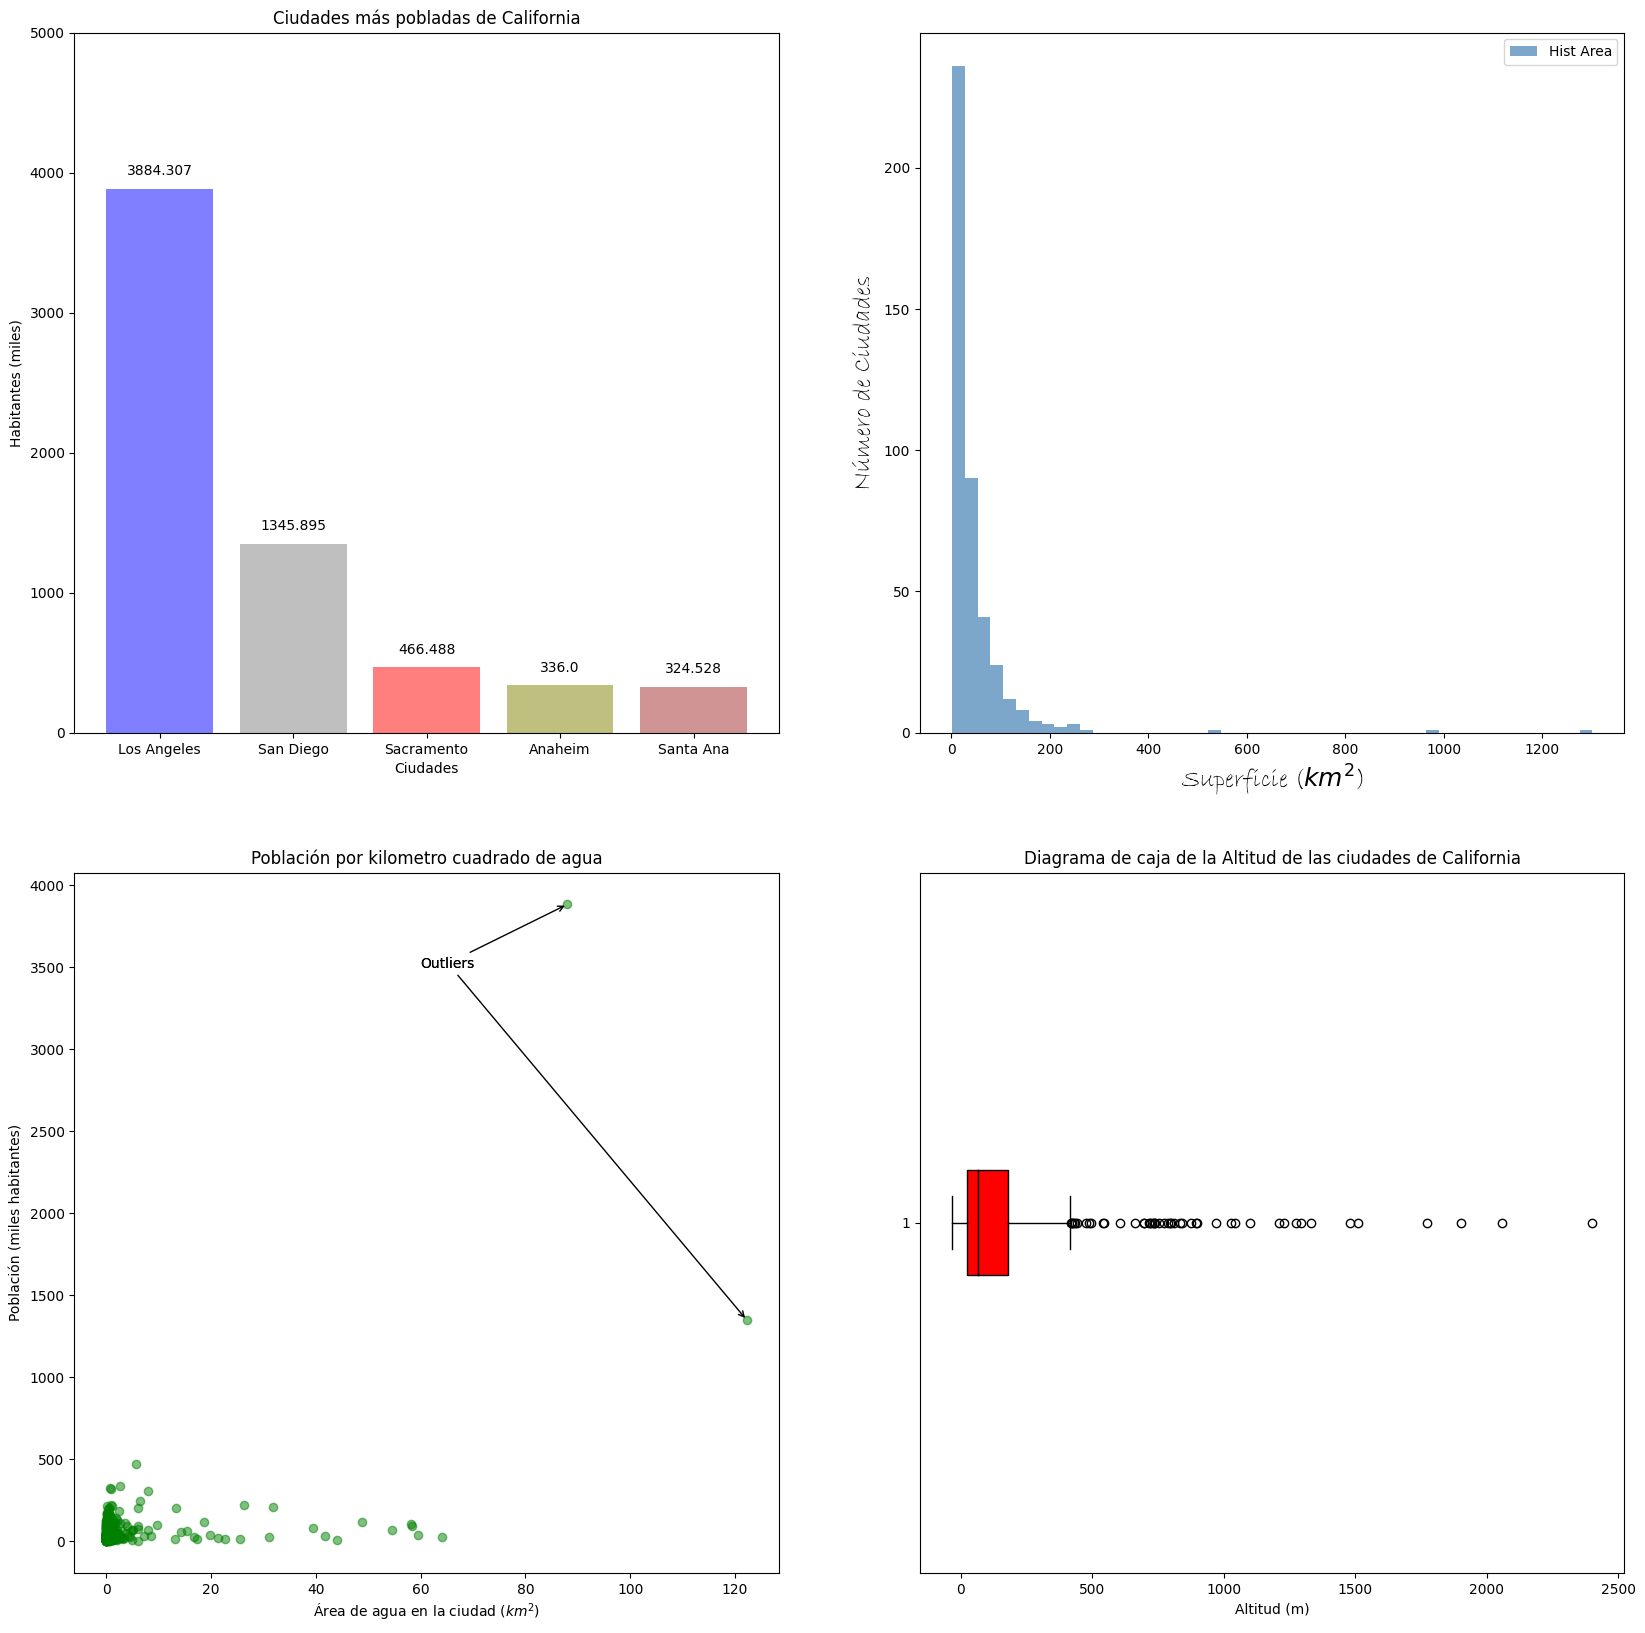

1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)


In [6]:
# Primero voy ver las 5 primeras ciudades más pobladas.

df_poblacion_ordenada = df_california.sort_values(by = "population_total", ascending = False)
df_top_pobladas = df_poblacion_ordenada[["city", "population_total"]].head()
df_top_pobladas # Lo grabo en un DF para poder trabajar únicamente con esos datos

,city,population_total
239,LosAngeles,3884307
367,SanDiego,1345895
375,SanJose,1000536
370,SanFrancisco,837442
150,Fresno,509039


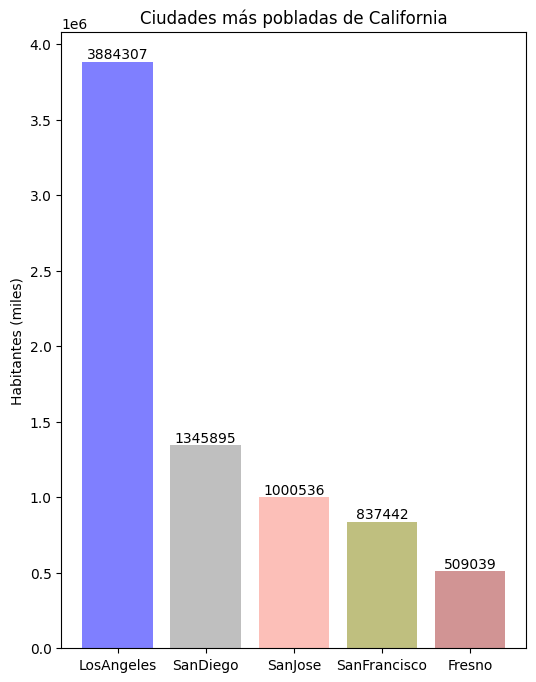

In [7]:
fig1 = plt.figure(figsize = (6,8)) # Guardo la figura en esta variable

colores = ["blue", "grey", "salmon", "olive", "brown"] # Guardo los colores en una lista para luego ponerlos en el parámetro correspondiente

# Creo la gráfica simple
bars = plt.bar(df_top_pobladas["city"], df_top_pobladas["population_total"], color = colores, alpha = 0.5)
plt.title("Ciudades más pobladas de California")
plt.ylabel("Habitantes (miles)");

# Inserto los valores de cada barra
for bar in bars:
    yval = bar.get_height() # devuelve la altura de cada barra al iterar sobre ellas
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 1), ha='center', va='bottom')



2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)

Text(0, 0.5, 'Número de ciudades')

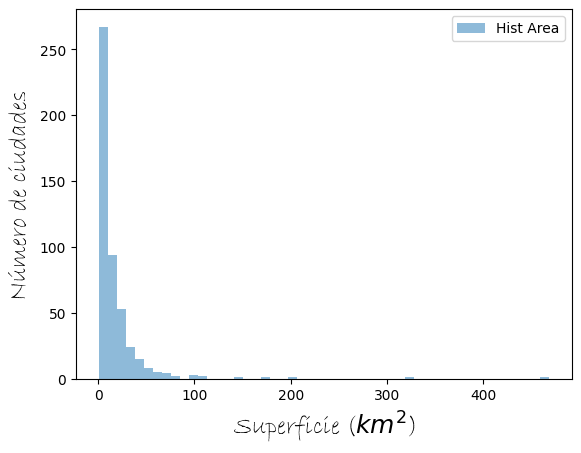

In [8]:
fig2 = plt.figure()

plt.hist(df_california["area_land_sq_mi"], bins = 50, alpha = 0.5, label = "Hist Area")
plt.legend()
font_dict= {
    "size": 18,
    "family": "Bradley Hand itc"
}

plt.xlabel(r"Superficie ($km^2$)", fontdict = font_dict);
plt.ylabel("Número de ciudades", fontdict = font_dict)

# He intentado ajustar los límite del eje 'x' y no me salen más datos como en la gráfica del ejemplo.

5. El scatter de área de agua de un ciudad con su poblacion.

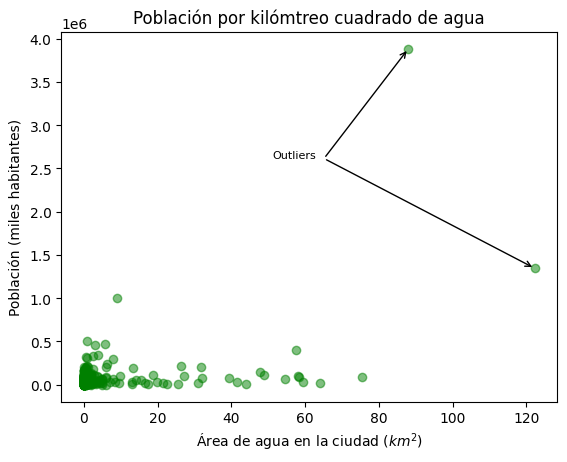

In [52]:
area_agua = np.array(df_california["area_water_km2"]) # Lo creo para que no me de problemas para buscar los outliers más adelante
poblacion = np.array(df_california["population_total"])


fig3 = plt.figure()

plt.scatter(df_california["area_water_km2"], df_california["population_total"], color = "green", alpha = 0.5);
plt.title("Población por kilómtreo cuadrado de agua")
plt.xlabel("Área de agua en la ciudad ($km^2$)")
plt.ylabel("Población (miles habitantes)");

# Para poder señalar dónde está los outlier, los voy a buscar en la gráfica
outliers_x = area_agua[(area_agua > 80)]
outliers_y = poblacion[(area_agua > 80)]

# Creo un bucle para iterar sobre los outlier y así crear el texto con las flechas
for i in range(len(outliers_x)): # Itero sobre la posición de los outliers
    
    plt.annotate('', 
                 xy=(outliers_x[i], outliers_y[i]), #accedo a los valores de cada outlier
                 xytext=(np.mean(outliers_x)- 40, np.mean(outliers_y)), #para poder ajustar las flechas hago la media con np. de los valores
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    
plt.text(np.mean(outliers_x) - 48, np.mean(outliers_y), 'Outliers', 
         horizontalalignment='center', fontsize=8);

#Las coordenadas (lo que he restado o por ejemplo, buscar los outliers, lo he ido haciendo a mano hasta que lo ha encontrado)

4. El boxplot de la altura de las ciudades.

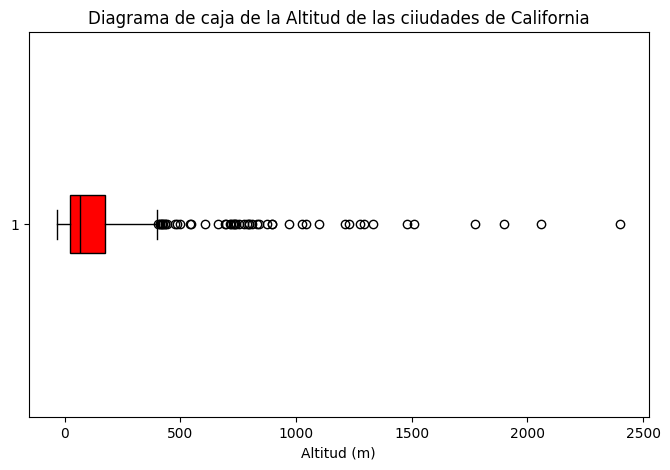

In [74]:
fig4 = plt.figure(figsize=(8,5))

altitud = df_california["elevation_m"].dropna().to_list()

box_props = {
    "facecolor": "red",
}
median_props = {
    "color": "black"
}
plt.boxplot(altitud, vert = False, patch_artist = True, boxprops = box_props, medianprops = median_props);

plt.title("Diagrama de caja de la Altitud de las ciiudades de California")
plt.xlabel("Altitud (m)");

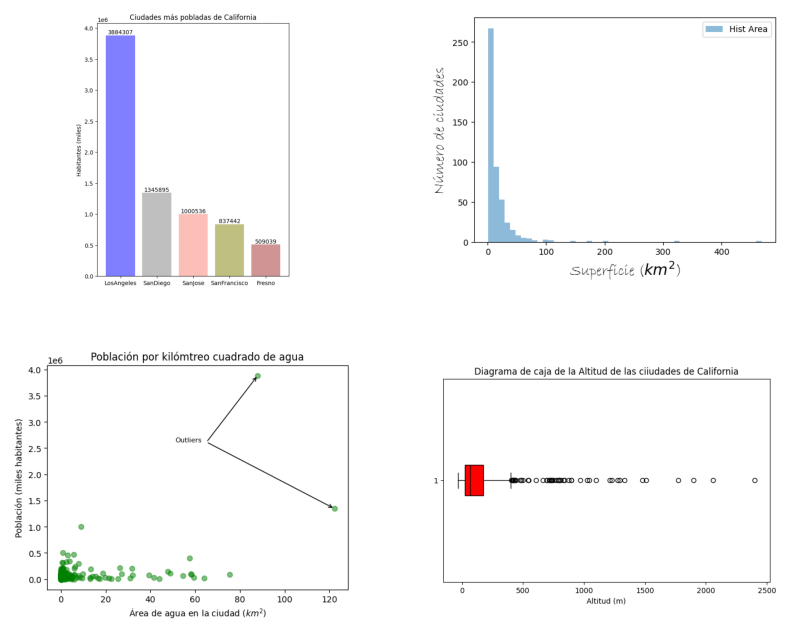

In [113]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10,8))

# Añadir fig1 al subplot ax1
ax1.axis('off')  # Desactivo los ejes del subplot
ax1.imshow(fig1.canvas.renderer.buffer_rgba()) #Extraigo los datos y lo muetro

# Añadir fig2 al subplot ax2
ax2.axis('off')  
ax2.imshow(fig2.canvas.renderer.buffer_rgba())  

# Añadir fig3 al subplot ax3
ax3.axis('off')  
ax3.imshow(fig3.canvas.renderer.buffer_rgba()) 

# Añadir fig4 al subplot ax4
ax4.axis('off') 
ax4.imshow(fig4.canvas.renderer.buffer_rgba());

plt.savefig('matplotlib_practica1.png')


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [114]:
# Lo he hecho arriba para que se guardara la figura